# Import libraries

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,f1_score,ConfusionMatrixDisplay
import pickle

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

# Reading data & preliminary statistics

In [2]:
data_raw = pd.read_excel("../Datasets/E Commerce Dataset.xlsx",sheet_name="E Comm")
data_raw.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## No. of rows and columns

In [3]:
print("No of Rows: {0}".format(data_raw.shape[0]))
print("No of Columns: {0}".format(data_raw.shape[1]))


No of Rows: 5630
No of Columns: 20


## Data description

In [4]:
data_raw.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
data_raw.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

## Value counts

In [7]:
for col in data_raw.columns.to_list():
    print("\n------- {0} -------\n".format(col))
    print(data_raw[col].value_counts())


------- CustomerID -------

50001    1
53751    1
53759    1
53758    1
53757    1
        ..
51876    1
51875    1
51874    1
51873    1
55630    1
Name: CustomerID, Length: 5630, dtype: int64

------- Churn -------

0    4682
1     948
Name: Churn, dtype: int64

------- Tenure -------

1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: Tenure, dtype: int64

------- PreferredLoginDevice -------

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

------- CityTier -------

1    3666
3    1722
2     242
Name: CityTier, dtype: int64

------- WarehouseToHo

## Null Records %

In [8]:
for col in data_raw.columns.to_list():
    print("\n{0} -------> {1}".format(col, round(data_raw[col].isna().sum()/data_raw.shape[0],2)))



CustomerID -------> 0.0

Churn -------> 0.0

Tenure -------> 0.05

PreferredLoginDevice -------> 0.0

CityTier -------> 0.0

WarehouseToHome -------> 0.04

PreferredPaymentMode -------> 0.0

Gender -------> 0.0

HourSpendOnApp -------> 0.05

NumberOfDeviceRegistered -------> 0.0

PreferedOrderCat -------> 0.0

SatisfactionScore -------> 0.0

MaritalStatus -------> 0.0

NumberOfAddress -------> 0.0

Complain -------> 0.0

OrderAmountHikeFromlastYear -------> 0.05

CouponUsed -------> 0.05

OrderCount -------> 0.05

DaySinceLastOrder -------> 0.05

CashbackAmount -------> 0.0


# EDA & Visualization

## Preprocessing

### Imputing the missing values

In [9]:
col_list = ["Tenure","WarehouseToHome","HourSpendOnApp","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder"]
for col in col_list:
    values_arr = data_raw[col].dropna()
    values_arr = values_arr.astype(float)
    mean_value = values_arr.mean()
    data_raw[col].fillna(mean_value, inplace=True)
    data_raw[col] = data_raw[col].astype(float)

In [10]:
for col in data_raw.columns.to_list():
    print("\n{0} -------> {1}".format(col, round(data_raw[col].isna().sum()/data_raw.shape[0],2)))



CustomerID -------> 0.0

Churn -------> 0.0

Tenure -------> 0.0

PreferredLoginDevice -------> 0.0

CityTier -------> 0.0

WarehouseToHome -------> 0.0

PreferredPaymentMode -------> 0.0

Gender -------> 0.0

HourSpendOnApp -------> 0.0

NumberOfDeviceRegistered -------> 0.0

PreferedOrderCat -------> 0.0

SatisfactionScore -------> 0.0

MaritalStatus -------> 0.0

NumberOfAddress -------> 0.0

Complain -------> 0.0

OrderAmountHikeFromlastYear -------> 0.0

CouponUsed -------> 0.0

OrderCount -------> 0.0

DaySinceLastOrder -------> 0.0

CashbackAmount -------> 0.0


## Processing

In [11]:
data_processed = data_raw.copy()
data_processed.drop("CustomerID", axis=1, inplace=True)

data_processed["Churn"].replace({0:"No",1: "Yes"}, inplace=True)
data_processed["Complain"].replace({0:"No",1: "Yes"}, inplace=True)

## Visualization

In [12]:
def histogram_visualization(col):
    fig = px.histogram(data_processed, x=col,color="Churn",
                   template="plotly_dark",
                   title="{0} vs Churn".format(col))
    fig.update_layout(title_x = 0.5,)
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()

## Outliers

In [13]:
fig = px.box(data_processed, y=["OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder","CashbackAmount"],
             labels={
                     "variable": "Columns with numerical values",
                     "value": "Values",
                 },
             template="plotly_dark",
             title="Outliers Visulaization")
fig.update_layout(title_x = 0.5,)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [14]:
col_list = ["PreferredLoginDevice","CityTier","PreferredPaymentMode","Gender","PreferedOrderCat","MaritalStatus","Complain"]
for col in col_list:
    histogram_visualization(col)

## Insights:

Potential drivers for churn

City tier: 1 <br>
Preffered Paymnet mode: Debit Card <br>
Marital Status: Single



# Model Building

## Train-Test Split

In [15]:
X = data_processed.drop("Churn",axis=1)
y = data_processed["Churn"]

y.replace({"Yes":1,"No":0},inplace=True)

X_enc = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_enc,y, test_size=0.1,random_state=111,stratify=y)

## Applying Models

In [16]:
def model_building(X, y, test, model, params = None, k = 3) :
    
    if params == None :
        model.fit(X, y)
        
        # return fitted model & train-test predictions
        return (model, model.predict(X), model.predict(test))
    
    else :
        model_cv = GridSearchCV(model, param_grid = params, cv = k)
        model_cv.fit(X, y)
        model = model_cv
        
        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(X), model.predict(test))
    
def model_evaluation(y_train, pred_train, y_test, pred_test,model) :
    
    print('''
            +--------------------------------------+
            | CLASSIFICATION REPORT FOR TRAIN DATA |
            +--------------------------------------+''')
    print(classification_report(y_train, pred_train))
    # print(confusion_matrix(y_train, pred_train))
    print("Printing Confussion Matrix for Train Data")
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, pred_train),
                                   display_labels=model.classes_)
    disp.plot()
    disp.ax_.set_title("Train Data {}".format(model))
    print("F1 Score: ",f1_score(y_train, pred_train,average="macro"))
    
    print('''
            +--------------------------------------+
            | CLASSIFICATION REPORT FOR TEST DATA  |
            +--------------------------------------+''')
    print(classification_report(y_test, pred_test))
    # print(confusion_matrix(y_test, pred_test))
    print("Printing Confussion Matrix for Test Data")
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_test),
                                   display_labels=model.classes_)
    disp.plot()
    disp.ax_.set_title(disp.ax_.set_title("Test Data {}".format(model)))
    print("F1 Score: ",f1_score(y_test, pred_test,average="macro"))


In [17]:
def plot_roc_curve(model,X_test,y_test):
    # Predict probabilities on the test set
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


***** Performing for GaussianNB() *****


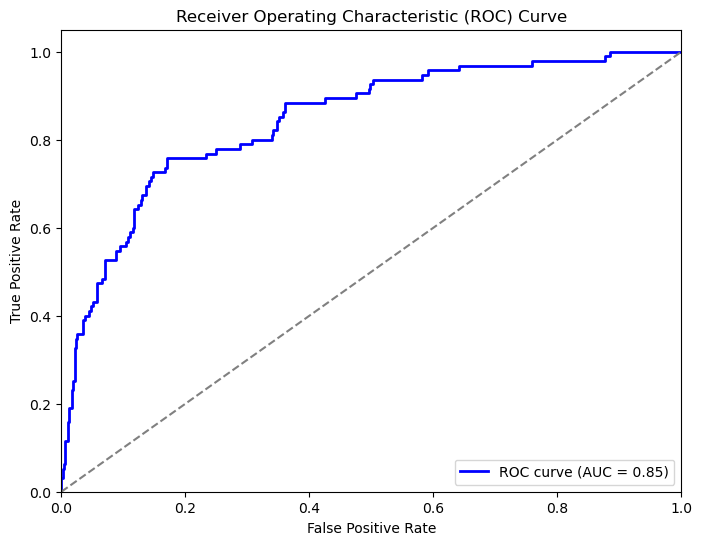


            +--------------------------------------+
            | CLASSIFICATION REPORT FOR TRAIN DATA |
            +--------------------------------------+
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      4214
           1       0.37      0.70      0.48       853

    accuracy                           0.75      5067
   macro avg       0.65      0.73      0.66      5067
weighted avg       0.83      0.75      0.77      5067

Printing Confussion Matrix for Train Data
F1 Score:  0.6562376206845417

            +--------------------------------------+
            | CLASSIFICATION REPORT FOR TEST DATA  |
            +--------------------------------------+
              precision    recall  f1-score   support

           0       0.94      0.75      0.84       468
           1       0.39      0.77      0.52        95

    accuracy                           0.76       563
   macro avg       0.66      0.76      0.68       563
weighted 

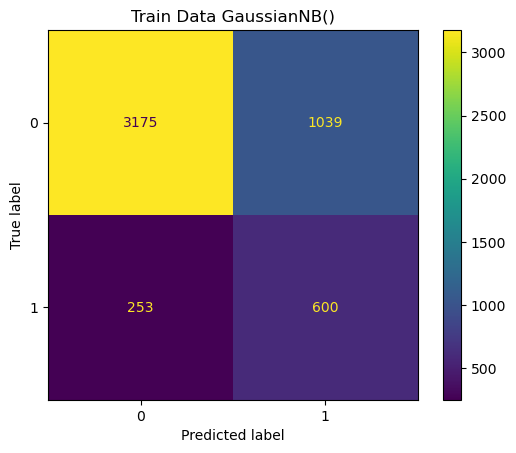

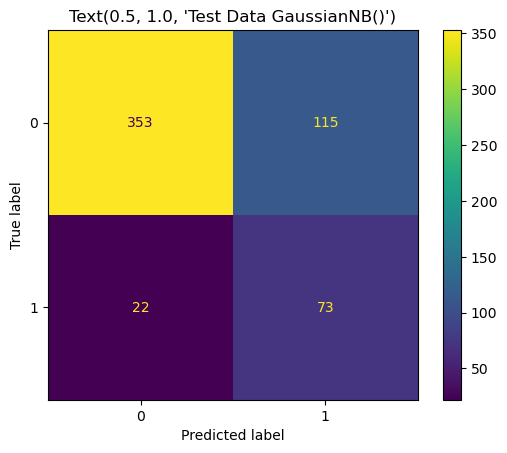

In [18]:
# model_list = [GaussianNB(), LogisticRegression(), DecisionTreeClassifier(),RandomForestClassifier(),SVC()]
model_list =[GaussianNB()]
for model in model_list:
    print("\n***** Performing for {0} *****".format(model))
    model, pred_train, pred_test = model_building(X_train, y_train,X_test,model,params = None)
    try:
        plot_roc_curve(model,X_test,y_test)
    except:
        print("Unable to create a model for {0}".format(model))
    model_evaluation(y_train, pred_train, y_test, pred_test,model)